In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv("C:\\Users\\dredk\\OneDrive\\Рабочий стол\\Datafiniti_Fast_Food_Restaurants_May19.csv")
df_2 = pd.read_csv ("C:\\Users\\dredk\\OneDrive\\Рабочий стол\\Datafiniti_Fast_Food_Restaurants.csv")
df_3 = pd.read_csv ("C:\\Users\\dredk\\OneDrive\\Рабочий стол\\FastFoodRestaurants.csv")

In [2]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   dateAdded          10000 non-null  object 
 2   dateUpdated        10000 non-null  object 
 3   address            10000 non-null  object 
 4   categories         10000 non-null  object 
 5   primaryCategories  10000 non-null  object 
 6   city               10000 non-null  object 
 7   country            10000 non-null  object 
 8   keys               10000 non-null  object 
 9   latitude           10000 non-null  float64
 10  longitude          10000 non-null  float64
 11  name               10000 non-null  object 
 12  postalCode         10000 non-null  object 
 13  province           10000 non-null  object 
 14  sourceURLs         10000 non-null  object 
 15  websites           9918 non-null   object 
dtypes: float64(2), object(1

In [3]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  object 
 1   dateAdded    10000 non-null  object 
 2   dateUpdated  10000 non-null  object 
 3   address      10000 non-null  object 
 4   categories   10000 non-null  object 
 5   city         10000 non-null  object 
 6   country      10000 non-null  object 
 7   keys         10000 non-null  object 
 8   latitude     10000 non-null  float64
 9   longitude    10000 non-null  float64
 10  name         10000 non-null  object 
 11  postalCode   10000 non-null  object 
 12  province     10000 non-null  object 
 13  sourceURLs   10000 non-null  object 
 14  websites     10000 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


In [4]:
#создадим отдельный датафрейм, который содержит даты 
df_4 = pd.concat([df_1, df_2])

In [5]:
#Приведем данные формату datetime 
df_4['dateAdded'] = df_4['dateAdded'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
df_4['dateUpdated'] = df_4['dateUpdated'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

In [6]:
#Датафрейм который содержит все три файла
df = pd.concat([df_4, df_3])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 20000 non-null  object        
 1   dateAdded          20000 non-null  datetime64[ns]
 2   dateUpdated        20000 non-null  datetime64[ns]
 3   address            30000 non-null  object        
 4   categories         20000 non-null  object        
 5   primaryCategories  10000 non-null  object        
 6   city               30000 non-null  object        
 7   country            30000 non-null  object        
 8   keys               30000 non-null  object        
 9   latitude           30000 non-null  float64       
 10  longitude          30000 non-null  float64       
 11  name               30000 non-null  object        
 12  postalCode         30000 non-null  object        
 13  province           30000 non-null  object        
 14  sourceU

In [8]:
#Убираем ненужные столбцы для дальнейшего анализа
df.drop (['id', 'keys', 'sourceURLs', 'websites'], axis=1, inplace = True)

In [9]:
df.isnull().sum()

dateAdded            10000
dateUpdated          10000
address                  0
categories           10000
primaryCategories    20000
city                     0
country                  0
latitude                 0
longitude                0
name                     0
postalCode               0
province                 0
dtype: int64

In [10]:
#Заполним пропуски в датах 
df["dateAdded"] = df["dateAdded"].fillna("Unknown")
df["dateUpdated"] = df["dateUpdated"].fillna("Unknown")
df["categories"] = df["categories"].fillna("Unknown")
df["primaryCategories"] = df["primaryCategories"].fillna("Unknown")

In [11]:
#Удалим дубликаты в датафрейме, который содердит 3 файла
df[df.duplicated(subset=["address"])]
df.drop_duplicates(subset=["address"], inplace = True)

df[df.duplicated(['latitude', 'longitude'])]
df.drop_duplicates(subset=['latitude', 'longitude'], inplace = True)

In [12]:
#Удалим дубликаты в датафрейме, который содердит даты добавления и обновления 

df_4[df_4.duplicated(subset=["address"])]
df_4.drop_duplicates(subset=["address"], inplace = True)

df_4[df_4.duplicated(['latitude', 'longitude'])]
df_4.drop_duplicates(subset=['latitude', 'longitude'], inplace = True)

Text(0, 0.5, 'Кол-во ресторанов фастфуда')

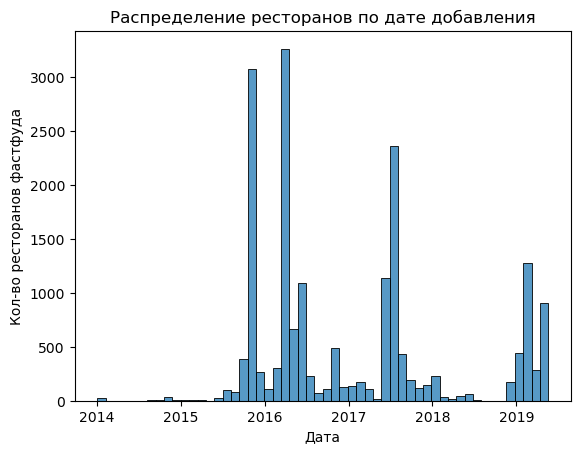

In [13]:
sns.histplot(df_4['dateAdded'])
plt.title("Распределение ресторанов по дате добавления")
plt.xlabel("Дата")
plt.ylabel("Кол-во ресторанов фастфуда")

Text(0, 0.5, 'Кол-во ресторанов фастфуда')

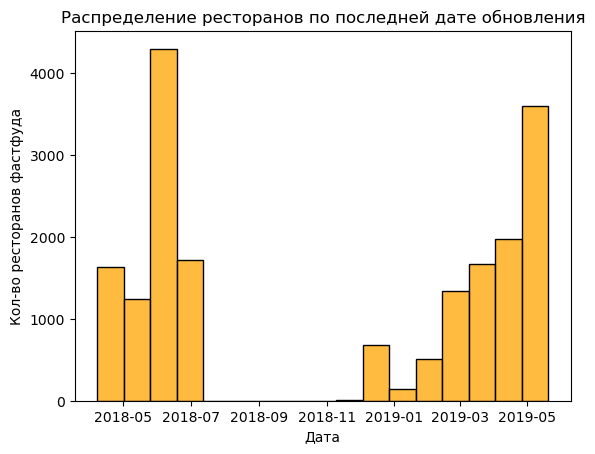

In [14]:
sns.histplot(df_4['dateUpdated'], color = 'orange')

plt.title("Распределение ресторанов по последней дате обновления")
plt.xlabel("Дата")
plt.ylabel("Кол-во ресторанов фастфуда")

In [15]:
# Создадим отдельный датафрейм, в который входят приоритетные города с точки зрения проверки рынка
cities_df = df[(df['city'] == 'Columbus') | (df['city'] == 'Cincinnati') | (df['city'] == 'Cleveland') | (df['city'] == 'Indianapolis')| (df['city'] == 'Birmingham')| (df['city'] == 'Portland')]

In [16]:
# Название ресторанов по смыслу имееют одно название, но записаны по-другому  

import nltk

# получим уникальные названия ресторанов
restaurant_names = cities_df['name'].unique()

# вычисляем сходство и записываем наиболее похожие имена вместе
most_similar = []
for i in range(len(restaurant_names)):
    # временный список для хранения текущих похожих слов
    temp_similar = [restaurant_names[i]]
    
    # сравниваем и сохраняем похожие слова
    for j in range(len(restaurant_names)):
        if restaurant_names[i] == restaurant_names[j]:
            continue
        if nltk.edit_distance(restaurant_names[i].lower(), restaurant_names[j].lower()) < 3:
            temp_similar.append(restaurant_names[j])
            
    if len(temp_similar) > 1:
        most_similar.append(temp_similar)
    if i > 0 and i % 10 == 0:
        print("index", i-10, "-", i, "checking finished| most similar size:", len(most_similar))
print("similarity checking finished")

# считаем количество похожих слов
most_similar_word_count = 0
for i in most_similar:
    most_similar_word_count += len(i)
print("size of the most similar list:", most_similar_word_count)
most_similar

index 0 - 10 checking finished| most similar size: 5
index 10 - 20 checking finished| most similar size: 10
index 20 - 30 checking finished| most similar size: 11
index 30 - 40 checking finished| most similar size: 13
index 40 - 50 checking finished| most similar size: 14
index 50 - 60 checking finished| most similar size: 15
index 60 - 70 checking finished| most similar size: 17
index 70 - 80 checking finished| most similar size: 20
index 80 - 90 checking finished| most similar size: 22
index 90 - 100 checking finished| most similar size: 26
index 100 - 110 checking finished| most similar size: 29
index 110 - 120 checking finished| most similar size: 29
index 120 - 130 checking finished| most similar size: 31
index 130 - 140 checking finished| most similar size: 33
index 140 - 150 checking finished| most similar size: 36
index 150 - 160 checking finished| most similar size: 38
index 160 - 170 checking finished| most similar size: 40
index 170 - 180 checking finished| most similar size

[['Kfc', 'KFC'],
 ["Jimmy John's", 'Jimmy Johns'],
 ['Sonic Drive-In', 'SONIC Drive In'],
 ['Subway', 'SUBWAY'],
 ["Rally's", 'Rallys'],
 ["Moe's Southwest Grill", 'Moes Southwest Grill'],
 ["Church's Chicken", 'Churchs Chicken'],
 ["Arby's", 'Arbys'],
 ['Chick-fil-A', 'Chick-Fil-A', 'ChickfilA'],
 ["Domino's Pizza", 'Dominos Pizza'],
 ["McAlister's Deli", 'McAlisters Deli'],
 ['SUBWAY', 'Subway'],
 ["Jersey Mike's Subs", 'Jersey Mikes Subs'],
 ["McDonald's", 'McDonalds', "Mcdonald's"],
 ['Gyro Stop', 'Gyro Spot'],
 ['KFC', 'Kfc'],
 ['Nicholas Restaurant', "Nicholas' Restaurant"],
 ['McDonalds', "McDonald's", "Mcdonald's"],
 ['WG Grinders', 'W.G. Grinders'],
 ['Fazolis', "Fazoli's"],
 ['Arbys', "Arby's"],
 ['Churchs Chicken', "Church's Chicken"],
 ['Moes Southwest Grill', "Moe's Southwest Grill"],
 ['Rallys', "Rally's"],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ['Jimmy Johns', "Jimmy John's"],
 ["Nicholas' Restaurant", 'Nicholas Restaurant'],
 ['Dominos Pizza', "Domino's Pizza"],

In [17]:
most_similar_edited = [['Kfc', 'KFC'],
 ["Jimmy John's", 'Jimmy Johns'],
 ['Sonic Drive-In', 'SONIC Drive In'],
 ['Subway', 'SUBWAY'],
 ["Rally's", 'Rallys'],
 ["Moe's Southwest Grill", 'Moes Southwest Grill'],
 ["Church's Chicken", 'Churchs Chicken'],
 ["Arby's", 'Arbys'],
 ['Chick-fil-A', 'Chick-Fil-A', 'ChickfilA'],
 ["Domino's Pizza", 'Dominos Pizza'],
 ["McAlister's Deli", 'McAlisters Deli'],
 ['SUBWAY', 'Subway'],
 ["Jersey Mike's Subs", 'Jersey Mikes Subs'],
 ["McDonald's", 'McDonalds', "Mcdonald's"],
 ['Gyro Stop', 'Gyro Spot'],
 ['KFC', 'Kfc'],
 ['Nicholas Restaurant', "Nicholas' Restaurant"],
 ['McDonalds', "McDonald's", "Mcdonald's"],
 ['WG Grinders', 'W.G. Grinders'],
 ['Fazolis', "Fazoli's"],
 ['Arbys', "Arby's"],
 ['Churchs Chicken', "Church's Chicken"],
 ['Moes Southwest Grill', "Moe's Southwest Grill"],
 ['Rallys', "Rally's"],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ['Jimmy Johns', "Jimmy John's"],
 ["Nicholas' Restaurant", 'Nicholas Restaurant'],
 ['Dominos Pizza', "Domino's Pizza"],
 ['Mr Hero', 'Mr. Hero'],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ['McAlisters Deli', "McAlister's Deli"],
 ['Jersey Mikes Subs', "Jersey Mike's Subs"],
 ["Fazoli's", 'Fazolis'],
 ["Dunkin' Donuts", 'Dunkin Donuts'],
 ['Gyro Spot', 'Gyro Stop'],
 ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'],
 ['ChickfilA', 'Chick-fil-A', 'Chick-Fil-A'],
 ['W.G. Grinders', 'WG Grinders'],
 ['Mr. Hero', 'Mr Hero'],
 ['SONIC Drive In', 'Sonic Drive-In'],
 ["Mcdonald's", "McDonald's", 'McDonalds'],
 ['Popeyes Louisiana Kitchen', "Popeye's Louisiana Kitchen"]]

In [18]:
def sortFirst(val): 
    return val[0]  

most_similar_edited.sort(key = sortFirst)  
most_similar_edited

[["Arby's", 'Arbys'],
 ['Arbys', "Arby's"],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ['Chick-fil-A', 'Chick-Fil-A', 'ChickfilA'],
 ['ChickfilA', 'Chick-fil-A', 'Chick-Fil-A'],
 ["Church's Chicken", 'Churchs Chicken'],
 ['Churchs Chicken', "Church's Chicken"],
 ["Domino's Pizza", 'Dominos Pizza'],
 ['Dominos Pizza', "Domino's Pizza"],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ["Dunkin' Donuts", 'Dunkin Donuts'],
 ["Fazoli's", 'Fazolis'],
 ['Fazolis', "Fazoli's"],
 ['Gyro Spot', 'Gyro Stop'],
 ['Gyro Stop', 'Gyro Spot'],
 ["Jersey Mike's Subs", 'Jersey Mikes Subs'],
 ['Jersey Mikes Subs', "Jersey Mike's Subs"],
 ["Jimmy John's", 'Jimmy Johns'],
 ['Jimmy Johns', "Jimmy John's"],
 ['KFC', 'Kfc'],
 ['Kfc', 'KFC'],
 ["McAlister's Deli", 'McAlisters Deli'],
 ['McAlisters Deli', "McAlister's Deli"],
 ["McDonald's", 'McDonalds', "Mcdonald's"],
 ['McDonalds', "McDonald's", "Mcdonald's"],
 ["Mcdonald's", "McDonald's", 'McDonalds'],
 ["Moe's Southwest Grill", 'Moes Southwest Grill'],
 ['Moes So

In [19]:
most_similar_sorted = [["Arby's", 'Arbys'],
 ['Arbys', "Arby's"],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ['Chick-fil-A', 'Chick-Fil-A', 'ChickfilA'],
 ['ChickfilA', 'Chick-fil-A', 'Chick-Fil-A'],
 ["Church's Chicken", 'Churchs Chicken'],
 ['Churchs Chicken', "Church's Chicken"],
 ["Domino's Pizza", 'Dominos Pizza'],
 ['Dominos Pizza', "Domino's Pizza"],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ["Dunkin' Donuts", 'Dunkin Donuts'],
 ["Fazoli's", 'Fazolis'],
 ['Fazolis', "Fazoli's"],
 ['Gyro Spot', 'Gyro Stop'],
 ['Gyro Stop', 'Gyro Spot'],
 ["Jersey Mike's Subs", 'Jersey Mikes Subs'],
 ['Jersey Mikes Subs', "Jersey Mike's Subs"],
 ["Jimmy John's", 'Jimmy Johns'],
 ['Jimmy Johns', "Jimmy John's"],
 ['KFC', 'Kfc'],
 ['Kfc', 'KFC'],
 ["McAlister's Deli", 'McAlisters Deli'],
 ['McAlisters Deli', "McAlister's Deli"],
 ["McDonald's", 'McDonalds', "Mcdonald's"],
 ['McDonalds', "McDonald's", "Mcdonald's"],
 ["Mcdonald's", "McDonald's", 'McDonalds'],
 ["Moe's Southwest Grill", 'Moes Southwest Grill'],
 ['Moes Southwest Grill', "Moe's Southwest Grill"],
 ['Mr Hero', 'Mr. Hero'],
 ['Mr. Hero', 'Mr Hero'],
 ['Nicholas Restaurant', "Nicholas' Restaurant"],
 ["Nicholas' Restaurant", 'Nicholas Restaurant'],
 ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'],
 ['Popeyes Louisiana Kitchen', "Popeye's Louisiana Kitchen"],
 ["Rally's", 'Rallys'],
 ['Rallys', "Rally's"],
 ['SONIC Drive In', 'Sonic Drive-In'],
 ['SUBWAY', 'Subway'],
 ['Sonic Drive-In', 'SONIC Drive In'],
 ['Subway', 'SUBWAY'],
 ['W.G. Grinders', 'WG Grinders'],
 ['WG Grinders', 'W.G. Grinders']]

In [20]:
match_name_dict = {}
for row in most_similar_sorted:
    for similar_word in row:
        match_name_dict[similar_word] = row[0]
match_name_dict

{"Arby's": 'Arbys',
 'Arbys': 'Arbys',
 'Chick-Fil-A': 'ChickfilA',
 'Chick-fil-A': 'ChickfilA',
 'ChickfilA': 'ChickfilA',
 "Church's Chicken": 'Churchs Chicken',
 'Churchs Chicken': 'Churchs Chicken',
 "Domino's Pizza": 'Dominos Pizza',
 'Dominos Pizza': 'Dominos Pizza',
 'Dunkin Donuts': "Dunkin' Donuts",
 "Dunkin' Donuts": "Dunkin' Donuts",
 "Fazoli's": 'Fazolis',
 'Fazolis': 'Fazolis',
 'Gyro Spot': 'Gyro Stop',
 'Gyro Stop': 'Gyro Stop',
 "Jersey Mike's Subs": 'Jersey Mikes Subs',
 'Jersey Mikes Subs': 'Jersey Mikes Subs',
 "Jimmy John's": 'Jimmy Johns',
 'Jimmy Johns': 'Jimmy Johns',
 'KFC': 'Kfc',
 'Kfc': 'Kfc',
 "McAlister's Deli": 'McAlisters Deli',
 'McAlisters Deli': 'McAlisters Deli',
 "McDonald's": "Mcdonald's",
 'McDonalds': "Mcdonald's",
 "Mcdonald's": "Mcdonald's",
 "Moe's Southwest Grill": 'Moes Southwest Grill',
 'Moes Southwest Grill': 'Moes Southwest Grill',
 'Mr Hero': 'Mr. Hero',
 'Mr. Hero': 'Mr. Hero',
 'Nicholas Restaurant': "Nicholas' Restaurant",
 "Nicholas'

In [21]:
names = cities_df['name'].values
print("size:", len(names))

# replace names with their dictionary value
for i in range(len(names)):
    if match_name_dict.get(names[i]) != None:
        names[i] = match_name_dict[names[i]]

#cities_df['names'] = names

size: 862


In [22]:
cities_df['province'].value_counts()

OH    447
IN    166
OR    102
AL     79
GA     19
TN     16
MS     11
TX      7
NE      4
KS      3
NC      2
ME      2
MI      1
MT      1
OK      1
WI      1
Name: province, dtype: int64

In [23]:
#Удалим выбросы, у которых координаты других штатов 
anomaly_states = cities_df[(cities_df['province'] == 'TN') | (cities_df['province'] == 'GA') | (cities_df['province'] == 'NE') | (cities_df['province'] == 'MS') | (cities_df['province'] == 'TX')| (cities_df['province'] == 'NC') | (cities_df['province'] == 'OK') | (cities_df['province'] == 'MI') | (cities_df['province'] == 'MT') | (cities_df['province'] == 'KS')| (cities_df['province'] == 'ME')| (cities_df['province'] == 'WI')].index
cities_df.drop(anomaly_states, inplace = True)

C:\Users\dredk\AppData\Local\Temp\ipykernel_14916\2364188476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df.drop(anomaly_states, inplace = True)


Text(0, 0.5, 'Количество ресторанов')

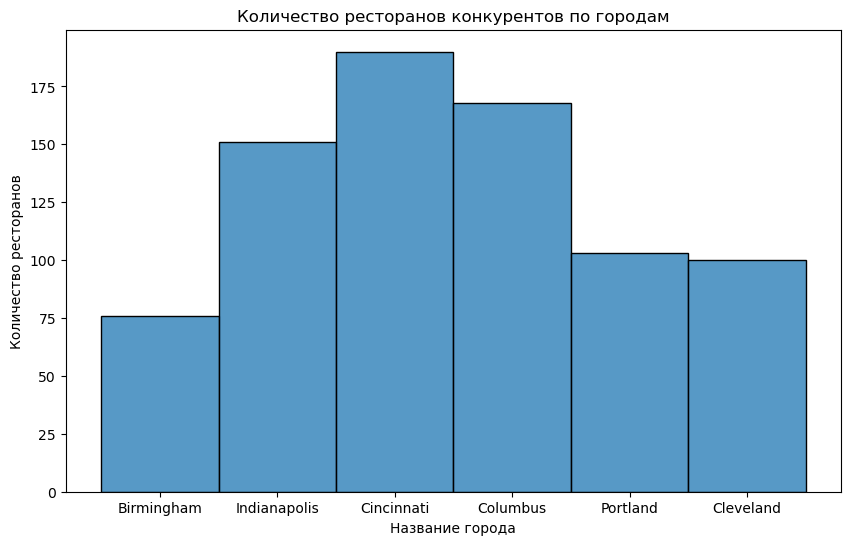

In [25]:
plt.figure(figsize=(10,6))

sns.histplot(cities_df['city'])
plt.title("Количество ресторанов конкурентов по городам")
plt.xlabel("Название города")
plt.ylabel("Количество ресторанов")

Text(0, 0.5, 'кол-во')

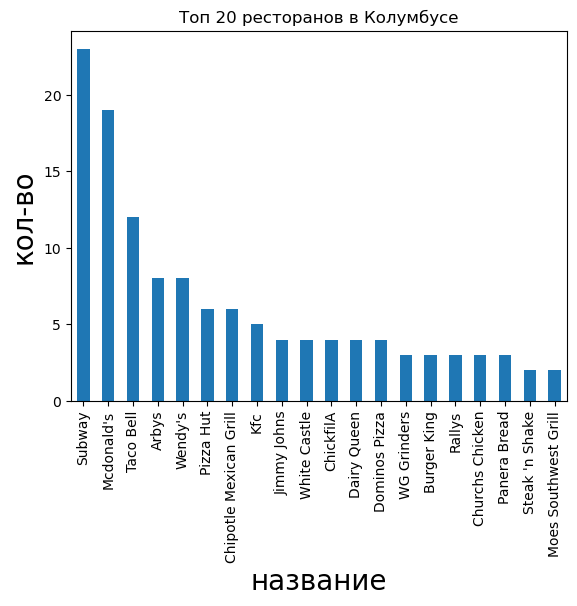

In [26]:
nameplot = cities_df[cities_df['city'] == "Columbus"]['name'].value_counts()[:20].plot.bar(title='Топ 20 ресторанов в Колумбусе')
nameplot.set_xlabel('название',size=20)
nameplot.set_ylabel('кол-во',size=20)

In [27]:
cities_df[cities_df["city"]=="Columbus"]["name"].value_counts()

Subway                               23
Mcdonald's                           19
Taco Bell                            12
Arbys                                 8
Wendy's                               8
Pizza Hut                             6
Chipotle Mexican Grill                6
Kfc                                   5
Jimmy Johns                           4
White Castle                          4
ChickfilA                             4
Dairy Queen                           4
Dominos Pizza                         4
WG Grinders                           3
Burger King                           3
Rallys                                3
Churchs Chicken                       3
Panera Bread                          3
Steak 'n Shake                        2
Moes Southwest Grill                  2
Bob Evans                             2
Penn Station East Coast Subs          2
Waffle House                          2
Firehouse Subs                        2
Popeyes Louisiana Kitchen             1


Text(0, 0.5, 'кол-во')

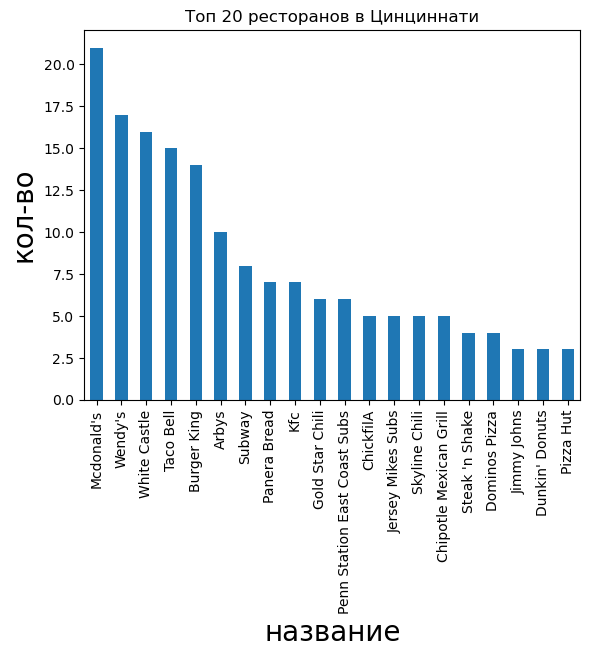

In [28]:
nameplot = cities_df[cities_df['city'] == "Cincinnati"]['name'].value_counts()[:20].plot.bar(title='Топ 20 ресторанов в Цинциннати')
nameplot.set_xlabel('название',size=20)
nameplot.set_ylabel('кол-во',size=20)

In [29]:
cities_df[cities_df["city"]=="Cincinnati"]["name"].value_counts()

Mcdonald's                          21
Wendy's                             17
White Castle                        16
Taco Bell                           15
Burger King                         14
Arbys                               10
Subway                               8
Panera Bread                         7
Kfc                                  7
Gold Star Chili                      6
Penn Station East Coast Subs         6
ChickfilA                            5
Jersey Mikes Subs                    5
Skyline Chili                        5
Chipotle Mexican Grill               5
Steak 'n Shake                       4
Dominos Pizza                        4
Jimmy Johns                          3
Dunkin' Donuts                       3
Pizza Hut                            3
Boston Market                        3
Chicago Gyros                        2
Bob Evans                            2
Jack in the Box                      1
Long John Silver's                   1
Five Guys                

Text(0, 0.5, 'кол-во')

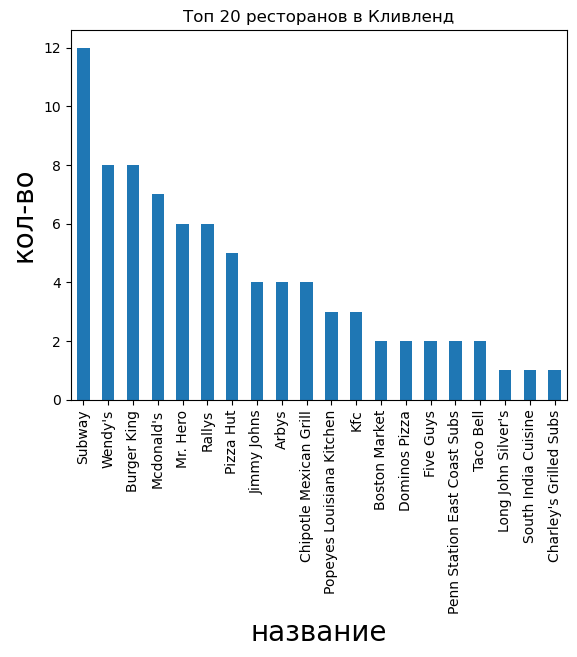

In [30]:
nameplot = cities_df[cities_df['city'] == "Cleveland"]['name'].value_counts()[:20].plot.bar(title='Топ 20 ресторанов в Кливленд')
nameplot.set_xlabel('название',size=20)
nameplot.set_ylabel('кол-во',size=20)

In [31]:
cities_df[cities_df["city"]=="Cleveland"]["name"].value_counts()

Subway                                12
Wendy's                                8
Burger King                            8
Mcdonald's                             7
Mr. Hero                               6
Rallys                                 6
Pizza Hut                              5
Jimmy Johns                            4
Arbys                                  4
Chipotle Mexican Grill                 4
Popeyes Louisiana Kitchen              3
Kfc                                    3
Boston Market                          2
Dominos Pizza                          2
Five Guys                              2
Penn Station East Coast Subs           2
Taco Bell                              2
Long John Silver's                     1
South India Cuisine                    1
Charley's Grilled Subs                 1
Sonic Drive-In                         1
Mr. Chicken                            1
Krispy Krunchy Chicken                 1
Gyro World                             1
Gentile's Bakery

Text(0, 0.5, 'кол-во')

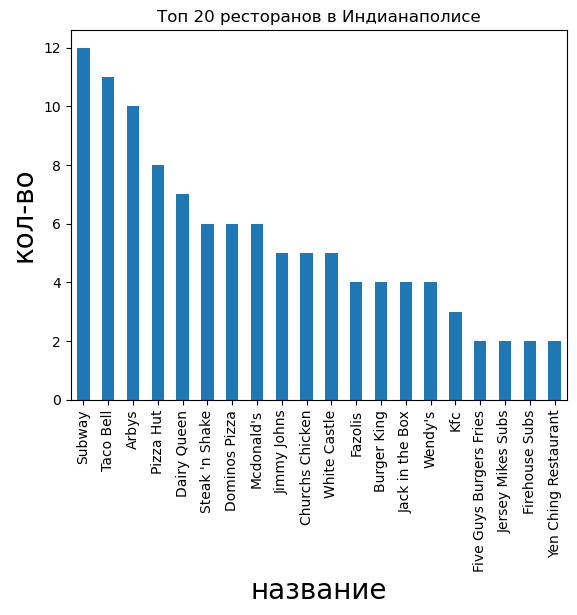

In [32]:
nameplot = cities_df[cities_df['city'] == "Indianapolis"]['name'].value_counts()[:20].plot.bar(title='Топ 20 ресторанов в Индианаполисе')
nameplot.set_xlabel('название',size=20)
nameplot.set_ylabel('кол-во',size=20)

In [33]:
cities_df[cities_df["city"]=="Indianapolis"]["name"].value_counts()

Subway                             12
Taco Bell                          11
Arbys                              10
Pizza Hut                           8
Dairy Queen                         7
Steak 'n Shake                      6
Dominos Pizza                       6
Mcdonald's                          6
Jimmy Johns                         5
Churchs Chicken                     5
White Castle                        5
Fazolis                             4
Burger King                         4
Jack in the Box                     4
Wendy's                             4
Kfc                                 3
Five Guys Burgers Fries             2
Jersey Mikes Subs                   2
Firehouse Subs                      2
Yen Ching Restaurant                2
Waffle House                        2
Chipotle Mexican Grill              2
Teddy's Burger Joint                2
Mediterrano Cafe                    2
Long John Silver's                  2
Bru Burger Bar                      2
Penn Station

Text(0, 0.5, 'кол-во')

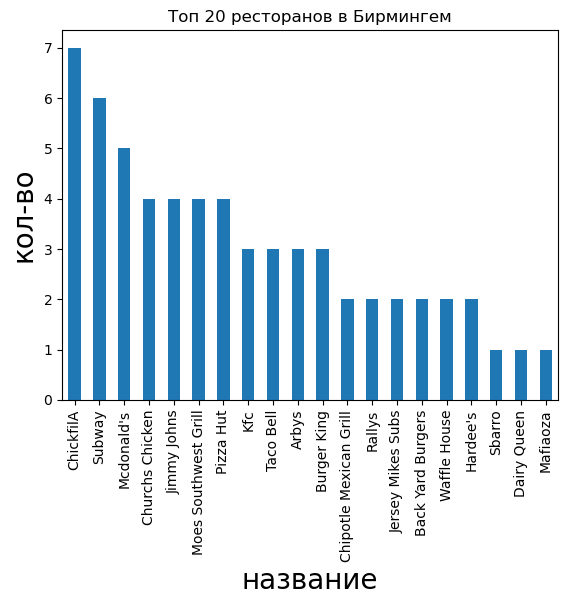

In [34]:
nameplot = cities_df[cities_df['city'] == "Birmingham"]['name'].value_counts()[:20].plot.bar(title='Топ 20 ресторанов в Бирмингем')
nameplot.set_xlabel('название',size=20)
nameplot.set_ylabel('кол-во',size=20)

In [35]:
cities_df[cities_df["city"]=="Birmingham"]["name"].value_counts()

ChickfilA                       7
Subway                          6
Mcdonald's                      5
Churchs Chicken                 4
Jimmy Johns                     4
Moes Southwest Grill            4
Pizza Hut                       4
Kfc                             3
Taco Bell                       3
Arbys                           3
Burger King                     3
Chipotle Mexican Grill          2
Rallys                          2
Jersey Mikes Subs               2
Back Yard Burgers               2
Waffle House                    2
Hardee's                        2
Sbarro                          1
Dairy Queen                     1
Mafiaoza                        1
Panera Bread                    1
Hamburger Heaven                1
Jack's                          1
Gyro's Cafe                     1
Saigon Noodle House             1
Full Moon Bar-B-Que             1
Jack Brown's Beer Burger Jnt    1
Dawson's Burgers Wings Fries    1
Jason's Deli                    1
Mellow Mushroo

Text(0, 0.5, 'кол-во')

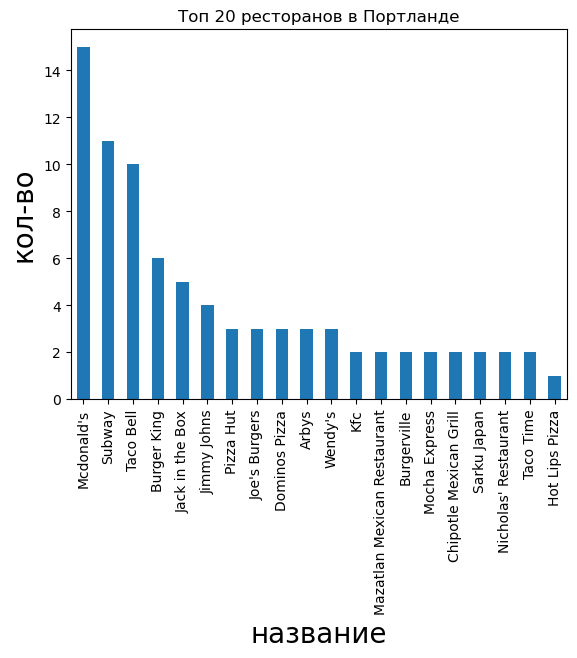

In [36]:
nameplot = cities_df[cities_df['city'] == "Portland"]['name'].value_counts()[:20].plot.bar(title='Топ 20 ресторанов в Портланде')
nameplot.set_xlabel('название',size=20)
nameplot.set_ylabel('кол-во',size=20)

In [37]:
cities_df[cities_df["city"]=="Birmingham"]["name"].value_counts()

ChickfilA                       7
Subway                          6
Mcdonald's                      5
Churchs Chicken                 4
Jimmy Johns                     4
Moes Southwest Grill            4
Pizza Hut                       4
Kfc                             3
Taco Bell                       3
Arbys                           3
Burger King                     3
Chipotle Mexican Grill          2
Rallys                          2
Jersey Mikes Subs               2
Back Yard Burgers               2
Waffle House                    2
Hardee's                        2
Sbarro                          1
Dairy Queen                     1
Mafiaoza                        1
Panera Bread                    1
Hamburger Heaven                1
Jack's                          1
Gyro's Cafe                     1
Saigon Noodle House             1
Full Moon Bar-B-Que             1
Jack Brown's Beer Burger Jnt    1
Dawson's Burgers Wings Fries    1
Jason's Deli                    1
Mellow Mushroo

In [38]:
!pip install folium

In [39]:
#Импортируем библиотеку для создания интерактивной карты где расположены все рестораны

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import folium
from folium.plugins import FastMarkerCluster
import re

In [40]:
lats = cities_df['latitude'].tolist()
lons = cities_df['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [41]:
target_postal_codes = pd.DataFrame()

In [73]:
# Эта часть кода возвращает неправильный датафрейм
# target_cities = cities_df['city'].unique()

# for city in target_cities:
    
# # Выбираем один из анализируемых городов, фильтруем по нему датафрейм
#     df_temp = cities_df[cities_df['city'] == city]
    
# # Считаем количество ресторанов, приходящихся на один почтовый код
#     df_restaurants_by_postal_code = df_temp.groupby('postalCode')['name'].agg('count').reset_index()
    
# # Добавляем колонку в датафрейм с названием анализируемого города
#     df_restaurants_by_postal_code['city'] = city
#     df_restaurants_by_postal_code.rename(columns = {'name':'number of restaurants'}, inplace = True)
# # Сортируем почтовые коды в порядке убывания ресторанов
#     df_restaurants_by_postal_code = df_restaurants_by_postal_code.sort_values(by = 'number of restaurants', ascending = False)
#     print(df_restaurants_by_postal_code)
    
# #    Присоединяем получившийся временный датафрейм для конкретного города к общему датафрейму
#     target_postal_codes = pd.concat([target_postal_codes, df_temp]).reset_index(drop = True)




# target_postal_codes.describe()

In [42]:
# Бирмингем
df_temp = cities_df[cities_df['city'] == 'Birmingham']
df_temp = df_temp.groupby('postalCode')['name'].agg('count').reset_index()
df_temp = df_temp.sort_values(by = 'name', ascending = False)
df_temp['city'] = 'Birmingham'
df_temp.rename(columns = {'name':'number of restaurants'}, inplace = True)
df_temp
target_postal_codes = pd.concat([target_postal_codes, df_temp]).reset_index(drop = True)

In [43]:
target_postal_codes

postalCode  number of restaurants        city
0       35216                     12  Birmingham
1       35215                      6  Birmingham
2       35242                      6  Birmingham
3       35244                      6  Birmingham
4       35209                      5  Birmingham
5       35203                      4  Birmingham
6       35235                      4  Birmingham
7       35233                      4  Birmingham
8       35210                      3  Birmingham
9       35211                      3  Birmingham
10      35243                      3  Birmingham
11      35205                      3  Birmingham
12      35234                      2  Birmingham
13      35208                      2  Birmingham
14      35217                      2  Birmingham
15      35204                      2  Birmingham
16      35214                      2  Birmingham
17      35223                      1  Birmingham
18      35224                      1  Birmingham
19      35228                      1  Birmingham
20      35206                      1  Birmingham
21      35213                      1  Birmingham
22      35212                      1  Birmingham
23      35218                      1  Birmingham

In [44]:
cities_df['city'].unique()

array(['Birmingham', 'Indianapolis', 'Cincinnati', 'Columbus', 'Portland',
       'Cleveland'], dtype=object)

In [45]:
# Indianapolis
df_temp = cities_df[cities_df['city'] == 'Indianapolis']
df_temp = df_temp.groupby('postalCode')['name'].agg('count').reset_index()
df_temp = df_temp.sort_values(by = 'name', ascending = False)
df_temp['city'] = 'Indianapolis'
df_temp.rename(columns = {'name':'number of restaurants'}, inplace = True)
df_temp
target_postal_codes = pd.concat([target_postal_codes, df_temp]).reset_index(drop = True)
target_postal_codes

postalCode  number of restaurants          city
0       35216                     12    Birmingham
1       35215                      6    Birmingham
2       35242                      6    Birmingham
3       35244                      6    Birmingham
4       35209                      5    Birmingham
5       35203                      4    Birmingham
6       35235                      4    Birmingham
7       35233                      4    Birmingham
8       35210                      3    Birmingham
9       35211                      3    Birmingham
10      35243                      3    Birmingham
11      35205                      3    Birmingham
12      35234                      2    Birmingham
13      35208                      2    Birmingham
14      35217                      2    Birmingham
15      35204                      2    Birmingham
16      35214                      2    Birmingham
17      35223                      1    Birmingham
18      35224                      1    Birmingham
19      35228                      1    Birmingham
20      35206                      1    Birmingham
21      35213                      1    Birmingham
22      35212                      1    Birmingham
23      35218                      1    Birmingham
24      46227                     15  Indianapolis
25      46203                     11  Indianapolis
26      46219                     11  Indianapolis
27      46204                      9  Indianapolis
28      46268                      9  Indianapolis
29      46250                      9  Indianapolis
30      46237                      8  Indianapolis
31      46254                      7  Indianapolis
32      46241                      7  Indianapolis
33      46240                      7  Indianapolis
34      46202                      6  Indianapolis
35      46217                      6  Indianapolis
36      46201                      5  Indianapolis
37      46226                      5  Indianapolis
38      46225                      4  Indianapolis
39      46229                      4  Indianapolis
40      46220                      4  Indianapolis
41      46214                      4  Indianapolis
42      46278                      4  Indianapolis
43      46222                      3  Indianapolis
44      46234                      2  Indianapolis
45      46221                      2  Indianapolis
46      46208                      2  Indianapolis
47      46224                      1  Indianapolis
48      46231                      1  Indianapolis
49      46236                      1  Indianapolis
50      46239                      1  Indianapolis
51      46218                      1  Indianapolis
52      46260                      1  Indianapolis
53      46205                      1  Indianapolis

In [46]:
# Цинциннати
df_temp = cities_df[cities_df['city'] == 'Cincinnati']
df_temp = df_temp.groupby('postalCode')['name'].agg('count').reset_index()
df_temp = df_temp.sort_values(by = 'name', ascending = False)
df_temp['city'] = 'Cincinnati'
df_temp.rename(columns = {'name':'number of restaurants'}, inplace = True)
df_temp
target_postal_codes = pd.concat([target_postal_codes, df_temp]).reset_index(drop = True)
target_postal_codes

postalCode  number of restaurants        city
0        35216                     12  Birmingham
1        35215                      6  Birmingham
2        35242                      6  Birmingham
3        35244                      6  Birmingham
4        35209                      5  Birmingham
..         ...                    ...         ...
87  45219-1309                      1  Cincinnati
88  45220-1216                      1  Cincinnati
89       45237                      1  Cincinnati
90       45225                      1  Cincinnati
91       45229                      1  Cincinnati

[92 rows x 3 columns]

In [47]:
# Колумбус
df_temp = cities_df[cities_df['city'] == 'Columbus']
df_temp = df_temp.groupby('postalCode')['name'].agg('count').reset_index()
df_temp = df_temp.sort_values(by = 'name', ascending = False)
df_temp['city'] = 'Columbus'
df_temp.rename(columns = {'name':'number of restaurants'}, inplace = True)
df_temp
target_postal_codes = pd.concat([target_postal_codes, df_temp]).reset_index(drop = True)
target_postal_codes

postalCode  number of restaurants        city
0         35216                     12  Birmingham
1         35215                      6  Birmingham
2         35242                      6  Birmingham
3         35244                      6  Birmingham
4         35209                      5  Birmingham
..          ...                    ...         ...
117  43230-1374                      1    Columbus
118       43227                      1    Columbus
119       43085                      1    Columbus
120       43203                      1    Columbus
121       47203                      1    Columbus

[122 rows x 3 columns]

In [48]:
# Портленд
df_temp = cities_df[cities_df['city'] == 'Portland']
df_temp = df_temp.groupby('postalCode')['name'].agg('count').reset_index()
df_temp = df_temp.sort_values(by = 'name', ascending = False)
df_temp['city'] = 'Portland'
df_temp.rename(columns = {'name':'number of restaurants'}, inplace = True)
df_temp
target_postal_codes = pd.concat([target_postal_codes, df_temp]).reset_index(drop = True)
target_postal_codes

postalCode  number of restaurants        city
0         35216                     12  Birmingham
1         35215                      6  Birmingham
2         35242                      6  Birmingham
3         35244                      6  Birmingham
4         35209                      5  Birmingham
..          ...                    ...         ...
149       97210                      1    Portland
150  97232-2014                      1    Portland
151       97236                      1    Portland
152  97239-1937                      1    Portland
153  97202-2166                      1    Portland

[154 rows x 3 columns]

In [49]:
# Cleveland
df_temp = cities_df[cities_df['city'] == 'Cleveland']
df_temp = df_temp.groupby('postalCode')['name'].agg('count').reset_index()
df_temp = df_temp.sort_values(by = 'name', ascending = False)
df_temp['city'] = 'Cleveland'
df_temp.rename(columns = {'name':'number of restaurants'}, inplace = True)
df_temp
target_postal_codes = pd.concat([target_postal_codes, df_temp]).reset_index(drop = True)
target_postal_codes

postalCode  number of restaurants        city
0        35216                     12  Birmingham
1        35215                      6  Birmingham
2        35242                      6  Birmingham
3        35244                      6  Birmingham
4        35209                      5  Birmingham
..         ...                    ...         ...
173      44126                      1   Cleveland
174      44114                      1   Cleveland
175      44135                      1   Cleveland
176      44104                      1   Cleveland
177      44102                      1   Cleveland

[178 rows x 3 columns]

In [57]:
# Меняем тип данных
target_postal_codes[(target_postal_codes['postalCode'] == '45219-1309')] = 45219
target_postal_codes[(target_postal_codes['postalCode'] == '97239-1937')] = 97239
target_postal_codes[(target_postal_codes['postalCode'] == '45220-1216')] = 45220
target_postal_codes[(target_postal_codes['postalCode'] == '43230-1374')] = 43230
target_postal_codes[(target_postal_codes['postalCode'] == '97219-4050')] = 97219
target_postal_codes[(target_postal_codes['postalCode'] == '97232-2014')] = 97232
target_postal_codes[(target_postal_codes['postalCode'] == '97202-2166')] = 97202

target_postal_codes['postalCode'] = target_postal_codes['postalCode'].astype(int)
target_postal_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   postalCode             178 non-null    int32 
 1   number of restaurants  178 non-null    int64 
 2   city                   178 non-null    object
dtypes: int32(1), int64(1), object(1)
memory usage: 3.6+ KB


In [58]:
df_taxpayers = pd.read_csv("C:\\Users\\dredk\\OneDrive\\Рабочий стол\\20zpallagi.csv")

In [59]:
df_taxpayers

STATEFIPS STATE  zipcode  agi_stub        N1     mars1     MARS2  \
0               1    AL        0         1  785000.0  519980.0   85690.0   
1               1    AL        0         2  554310.0  270870.0  121420.0   
2               1    AL        0         3  290630.0  113280.0  124770.0   
3               1    AL        0         4  181010.0   42010.0  120820.0   
4               1    AL        0         5  269080.0   31310.0  224330.0   
...           ...   ...      ...       ...       ...       ...       ...   
166447         56    WY    99999         2    3490.0    2010.0     940.0   
166448         56    WY    99999         3    2350.0    1030.0    1080.0   
166449         56    WY    99999         4    1700.0     530.0    1080.0   
166450         56    WY    99999         5    2560.0     420.0    2080.0   
166451         56    WY    99999         6     830.0     160.0     700.0   

           MARS4       ELF    CPREP  ...  N85300  A85300    N11901    A11901  \
0       165290.0  724170.0  22560.0  ...     0.0     0.0   57720.0   46577.0   
1       146470.0  515150.0  13260.0  ...     0.0     0.0   81770.0  112540.0   
2        44570.0  269700.0   6420.0  ...     0.0     0.0   70360.0  144380.0   
3        14410.0  168830.0   2570.0  ...     0.0     0.0   49500.0  135429.0   
4         8270.0  252360.0   3250.0  ...   100.0    20.0  103250.0  470206.0   
...          ...       ...      ...  ...     ...     ...       ...       ...   
166447     440.0    3290.0     70.0  ...     0.0     0.0     440.0     590.0   
166448     200.0    2220.0     50.0  ...     0.0     0.0     460.0     947.0   
166449     100.0    1630.0     30.0  ...     0.0     0.0     410.0    1052.0   
166450      80.0    2470.0     40.0  ...     0.0     0.0     820.0    3897.0   
166451       0.0     850.0      0.0  ...   510.0  3685.0     390.0   12002.0   

          N11900     A11900    N11902     A11902   N12000   A12000  
0       674840.0  1827202.0  672200.0  1818867.0   2900.0   6089.0  
1       470410.0  1445383.0  466960.0  1432458.0   4660.0  11648.0  
2       220710.0   626662.0  216530.0   610170.0   5760.0  16235.0  
3       130670.0   437179.0  126790.0   419324.0   3730.0  14903.0  
4       165650.0   724529.0  156910.0   642895.0  11280.0  80064.0  
...          ...        ...       ...        ...      ...      ...  
166447    2930.0     8141.0    2880.0     7855.0     50.0     86.0  
166448    1800.0     5772.0    1720.0     5164.0     70.0    257.0  
166449    1230.0     4529.0    1160.0     4188.0     50.0    139.0  
166450    1660.0     8677.0    1480.0     7299.0    200.0   1036.0  
166451     400.0    18594.0     170.0     2893.0    230.0  13413.0  

[166452 rows x 165 columns]

In [60]:
# Оставляем почтовый индекс, размер дохода (1 = мало, 6 = много), количество налогоплательщиков
df_taxpayers = df_taxpayers.filter(items=['zipcode', 'agi_stub','N1'])
df_taxpayers.rename(columns = {'zipcode':'postalCode'}, inplace = True)
df_taxpayers

postalCode  agi_stub        N1
0                0         1  785000.0
1                0         2  554310.0
2                0         3  290630.0
3                0         4  181010.0
4                0         5  269080.0
...            ...       ...       ...
166447       99999         2    3490.0
166448       99999         3    2350.0
166449       99999         4    1700.0
166450       99999         5    2560.0
166451       99999         6     830.0

[166452 rows x 3 columns]

In [61]:


df_taxpayers_1 = df_taxpayers[df_taxpayers['agi_stub'] == 1]

df_taxpayers_1.info()

df_taxpayers_1.rename(columns = {'N1':'1-25000'}, inplace = True)
df_taxpayers_1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27744 entries, 0 to 166446
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   postalCode  27744 non-null  int64  
 1   agi_stub    27744 non-null  int64  
 2   N1          27744 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 867.0 KB


C:\Users\dredk\AppData\Local\Temp\ipykernel_14916\3570126892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxpayers_1.rename(columns = {'N1':'1-25000'}, inplace = True)


postalCode  agi_stub   1-25000
0                0         1  785000.0
6            35004         1    1460.0
12           35005         1    1380.0
18           35006         1     400.0
24           35007         1    3930.0
...            ...       ...       ...
166422       83126         1      60.0
166428       83127         1     420.0
166434       83128         1     280.0
166440       83414         1      50.0
166446       99999         1    4540.0

[27744 rows x 3 columns]

In [62]:
# Вторая категория налогоплательщиков - это те, кто зарабатывают в год от 25 до 50 тыс. долл.
# Сделаем предположение, что это наша целевая аудитория, для упрощения дальнейших расчетов

df_taxpayers_2 = df_taxpayers[df_taxpayers['agi_stub'] == 2]

df_taxpayers_2.info()
df_taxpayers_2.rename(columns = {'N1':'25000-50000'}, inplace = True)
df_taxpayers_2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27744 entries, 1 to 166447
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   postalCode  27744 non-null  int64  
 1   agi_stub    27744 non-null  int64  
 2   N1          27744 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 867.0 KB


C:\Users\dredk\AppData\Local\Temp\ipykernel_14916\4052992768.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxpayers_2.rename(columns = {'N1':'25000-50000'}, inplace = True)


postalCode  agi_stub  25000-50000
1                0         2     554310.0
7            35004         2       1400.0
13           35005         2       1120.0
19           35006         2        330.0
25           35007         2       2990.0
...            ...       ...          ...
166423       83126         2         40.0
166429       83127         2        350.0
166435       83128         2        240.0
166441       83414         2         30.0
166447       99999         2       3490.0

[27744 rows x 3 columns]

In [63]:
df_taxpayers_3 = df_taxpayers[df_taxpayers['agi_stub'] == 3]

df_taxpayers_3.info()
df_taxpayers_3.rename(columns = {'N1':'50000-75000'}, inplace = True)
df_taxpayers_3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27744 entries, 2 to 166448
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   postalCode  27744 non-null  int64  
 1   agi_stub    27744 non-null  int64  
 2   N1          27744 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 867.0 KB


C:\Users\dredk\AppData\Local\Temp\ipykernel_14916\2432884507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxpayers_3.rename(columns = {'N1':'50000-75000'}, inplace = True)


postalCode  agi_stub  50000-75000
2                0         3     290630.0
8            35004         3       1020.0
14           35005         3        510.0
20           35006         3        190.0
26           35007         3       1930.0
...            ...       ...          ...
166424       83126         3         30.0
166430       83127         3        290.0
166436       83128         3        200.0
166442       83414         3         30.0
166448       99999         3       2350.0

[27744 rows x 3 columns]

In [64]:
df_taxpayers_4 = df_taxpayers[df_taxpayers['agi_stub'] == 4]

df_taxpayers_4.info()
df_taxpayers_4.rename(columns = {'N1':'75000-100000'}, inplace = True)
df_taxpayers_4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27738 entries, 3 to 166449
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   postalCode  27738 non-null  int64  
 1   agi_stub    27738 non-null  int64  
 2   N1          27738 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 866.8 KB


C:\Users\dredk\AppData\Local\Temp\ipykernel_14916\3751420554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxpayers_4.rename(columns = {'N1':'75000-100000'}, inplace = True)


postalCode  agi_stub  75000-100000
3                0         4      181010.0
9            35004         4         630.0
15           35005         4         220.0
21           35006         4         150.0
27           35007         4        1390.0
...            ...       ...           ...
166425       83126         4          30.0
166431       83127         4         240.0
166437       83128         4         120.0
166443       83414         4          20.0
166449       99999         4        1700.0

[27738 rows x 3 columns]

In [65]:
df_taxpayers_5 = df_taxpayers[df_taxpayers['agi_stub'] == 5]

df_taxpayers_5.info()
df_taxpayers_5.rename(columns = {'N1':'100000-200000'}, inplace = True)
df_taxpayers_5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27738 entries, 4 to 166450
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   postalCode  27738 non-null  int64  
 1   agi_stub    27738 non-null  int64  
 2   N1          27738 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 866.8 KB


C:\Users\dredk\AppData\Local\Temp\ipykernel_14916\642893424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxpayers_5.rename(columns = {'N1':'100000-200000'}, inplace = True)


postalCode  agi_stub  100000-200000
4                0         5       269080.0
10           35004         5          810.0
16           35005         5          190.0
22           35006         5          140.0
28           35007         5         2030.0
...            ...       ...            ...
166426       83126         5           50.0
166432       83127         5          380.0
166438       83128         5          200.0
166444       83414         5           50.0
166450       99999         5         2560.0

[27738 rows x 3 columns]

In [66]:
df_taxpayers_6 = df_taxpayers[df_taxpayers['agi_stub'] == 6]

df_taxpayers_6.info()
df_taxpayers_6.rename(columns = {'N1':'>200000'}, inplace = True)
df_taxpayers_6

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27744 entries, 5 to 166451
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   postalCode  27744 non-null  int64  
 1   agi_stub    27744 non-null  int64  
 2   N1          27744 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 867.0 KB


C:\Users\dredk\AppData\Local\Temp\ipykernel_14916\1954835524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxpayers_6.rename(columns = {'N1':'>200000'}, inplace = True)


postalCode  agi_stub  >200000
5                0         6  81340.0
11           35004         6    100.0
17           35005         6     20.0
23           35006         6     20.0
29           35007         6    330.0
...            ...       ...      ...
166427       83126         6      0.0
166433       83127         6    130.0
166439       83128         6    100.0
166445       83414         6     60.0
166451       99999         6    830.0

[27744 rows x 3 columns]

In [67]:
df_postal_codes_population_1 = target_postal_codes.merge(df_taxpayers_1, on ='postalCode', 
                      how = 'left')
df_postal_codes_population

NameError: name 'df_postal_codes_population' is not defined

In [68]:
# Соединяем перечень интересующих нас почтовых кодов с перечнем налогоплательщиков второй категории
# Таким образом подготовлена база для оценки платежеспособности жителей районов, 
# в которых мы потенциально собираемся открыть кафе

df_postal_codes_population = target_postal_codes.merge(df_taxpayers_1, on ='postalCode', 
                      how = 'left')
df_postal_codes_population

postalCode  number of restaurants        city  agi_stub  1-25000
0         35216                     12  Birmingham       1.0   4890.0
1         35215                      6  Birmingham       1.0   9760.0
2         35242                      6  Birmingham       1.0   6140.0
3         35244                      6  Birmingham       1.0   4070.0
4         35209                      5  Birmingham       1.0   3480.0
..          ...                    ...         ...       ...      ...
173       44126                      1   Cleveland       1.0   2490.0
174       44114                      1   Cleveland       1.0   1100.0
175       44135                      1   Cleveland       1.0   5380.0
176       44104                      1   Cleveland       1.0   4480.0
177       44102                      1   Cleveland       1.0   8670.0

[178 rows x 5 columns]

In [69]:
df_postal_codes_population = df_postal_codes_population.merge(df_taxpayers_2, on ='postalCode', 
                      how = 'left')
df_postal_codes_population

postalCode  number of restaurants        city  agi_stub_x  1-25000  \
0         35216                     12  Birmingham         1.0   4890.0   
1         35215                      6  Birmingham         1.0   9760.0   
2         35242                      6  Birmingham         1.0   6140.0   
3         35244                      6  Birmingham         1.0   4070.0   
4         35209                      5  Birmingham         1.0   3480.0   
..          ...                    ...         ...         ...      ...   
173       44126                      1   Cleveland         1.0   2490.0   
174       44114                      1   Cleveland         1.0   1100.0   
175       44135                      1   Cleveland         1.0   5380.0   
176       44104                      1   Cleveland         1.0   4480.0   
177       44102                      1   Cleveland         1.0   8670.0   

     agi_stub_y  25000-50000  
0           2.0       3880.0  
1           2.0       6870.0  
2           2.0       4520.0  
3           2.0       3140.0  
4           2.0       2560.0  
..          ...          ...  
173         2.0       2230.0  
174         2.0        740.0  
175         2.0       4490.0  
176         2.0       1920.0  
177         2.0       5630.0  

[178 rows x 7 columns]

In [70]:
df_postal_codes_population = df_postal_codes_population.merge(df_taxpayers_3, on ='postalCode', 
                      how = 'left')
df_postal_codes_population

postalCode  number of restaurants        city  agi_stub_x  1-25000  \
0         35216                     12  Birmingham         1.0   4890.0   
1         35215                      6  Birmingham         1.0   9760.0   
2         35242                      6  Birmingham         1.0   6140.0   
3         35244                      6  Birmingham         1.0   4070.0   
4         35209                      5  Birmingham         1.0   3480.0   
..          ...                    ...         ...         ...      ...   
173       44126                      1   Cleveland         1.0   2490.0   
174       44114                      1   Cleveland         1.0   1100.0   
175       44135                      1   Cleveland         1.0   5380.0   
176       44104                      1   Cleveland         1.0   4480.0   
177       44102                      1   Cleveland         1.0   8670.0   

     agi_stub_y  25000-50000  agi_stub  50000-75000  
0           2.0       3880.0       3.0       2220.0  
1           2.0       6870.0       3.0       2440.0  
2           2.0       4520.0       3.0       3070.0  
3           2.0       3140.0       3.0       2350.0  
4           2.0       2560.0       3.0       1400.0  
..          ...          ...       ...          ...  
173         2.0       2230.0       3.0       1750.0  
174         2.0        740.0       3.0        520.0  
175         2.0       4490.0       3.0       2030.0  
176         2.0       1920.0       3.0        390.0  
177         2.0       5630.0       3.0       2180.0  

[178 rows x 9 columns]

In [71]:
df_postal_codes_population = df_postal_codes_population.merge(df_taxpayers_4, on ='postalCode', 
                      how = 'left')
df_postal_codes_population

C:\Users\dredk\AppData\Local\Temp\ipykernel_14916\1129899359.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'agi_stub_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_postal_codes_population = df_postal_codes_population.merge(df_taxpayers_4, on ='postalCode',


postalCode  number of restaurants        city  agi_stub_x  1-25000  \
0         35216                     12  Birmingham         1.0   4890.0   
1         35215                      6  Birmingham         1.0   9760.0   
2         35242                      6  Birmingham         1.0   6140.0   
3         35244                      6  Birmingham         1.0   4070.0   
4         35209                      5  Birmingham         1.0   3480.0   
..          ...                    ...         ...         ...      ...   
173       44126                      1   Cleveland         1.0   2490.0   
174       44114                      1   Cleveland         1.0   1100.0   
175       44135                      1   Cleveland         1.0   5380.0   
176       44104                      1   Cleveland         1.0   4480.0   
177       44102                      1   Cleveland         1.0   8670.0   

     agi_stub_y  25000-50000  agi_stub_x  50000-75000  agi_stub_y  \
0           2.0       3880.0         3.0       2220.0         4.0   
1           2.0       6870.0         3.0       2440.0         4.0   
2           2.0       4520.0         3.0       3070.0         4.0   
3           2.0       3140.0         3.0       2350.0         4.0   
4           2.0       2560.0         3.0       1400.0         4.0   
..          ...          ...         ...          ...         ...   
173         2.0       2230.0         3.0       1750.0         4.0   
174         2.0        740.0         3.0        520.0         4.0   
175         2.0       4490.0         3.0       2030.0         4.0   
176         2.0       1920.0         3.0        390.0         4.0   
177         2.0       5630.0         3.0       2180.0         4.0   

     75000-100000  
0          1200.0  
1           940.0  
2          2340.0  
3          1670.0  
4           770.0  
..            ...  
173        1080.0  
174         270.0  
175         770.0  
176         100.0  
177         800.0  

[178 rows x 11 columns]

In [72]:
df_postal_codes_population = df_postal_codes_population.merge(df_taxpayers_5, on ='postalCode', 
                      how = 'left')
df_postal_codes_population

postalCode  number of restaurants        city  agi_stub_x  1-25000  \
0         35216                     12  Birmingham         1.0   4890.0   
1         35215                      6  Birmingham         1.0   9760.0   
2         35242                      6  Birmingham         1.0   6140.0   
3         35244                      6  Birmingham         1.0   4070.0   
4         35209                      5  Birmingham         1.0   3480.0   
..          ...                    ...         ...         ...      ...   
173       44126                      1   Cleveland         1.0   2490.0   
174       44114                      1   Cleveland         1.0   1100.0   
175       44135                      1   Cleveland         1.0   5380.0   
176       44104                      1   Cleveland         1.0   4480.0   
177       44102                      1   Cleveland         1.0   8670.0   

     agi_stub_y  25000-50000  agi_stub_x  50000-75000  agi_stub_y  \
0           2.0       3880.0         3.0       2220.0         4.0   
1           2.0       6870.0         3.0       2440.0         4.0   
2           2.0       4520.0         3.0       3070.0         4.0   
3           2.0       3140.0         3.0       2350.0         4.0   
4           2.0       2560.0         3.0       1400.0         4.0   
..          ...          ...         ...          ...         ...   
173         2.0       2230.0         3.0       1750.0         4.0   
174         2.0        740.0         3.0        520.0         4.0   
175         2.0       4490.0         3.0       2030.0         4.0   
176         2.0       1920.0         3.0        390.0         4.0   
177         2.0       5630.0         3.0       2180.0         4.0   

     75000-100000  agi_stub  100000-200000  
0          1200.0       5.0         2500.0  
1           940.0       5.0          770.0  
2          2340.0       5.0         5870.0  
3          1670.0       5.0         4150.0  
4           770.0       5.0         1960.0  
..            ...       ...            ...  
173        1080.0       5.0         1570.0  
174         270.0       5.0          310.0  
175         770.0       5.0          590.0  
176         100.0       5.0           40.0  
177         800.0       5.0          960.0  

[178 rows x 13 columns]

In [73]:
df_postal_codes_population = df_postal_codes_population.merge(df_taxpayers_6, on ='postalCode', 
                      how = 'left')
df_postal_codes_population

C:\Users\dredk\AppData\Local\Temp\ipykernel_14916\788428413.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'agi_stub_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_postal_codes_population = df_postal_codes_population.merge(df_taxpayers_6, on ='postalCode',


postalCode  number of restaurants        city  agi_stub_x  1-25000  \
0         35216                     12  Birmingham         1.0   4890.0   
1         35215                      6  Birmingham         1.0   9760.0   
2         35242                      6  Birmingham         1.0   6140.0   
3         35244                      6  Birmingham         1.0   4070.0   
4         35209                      5  Birmingham         1.0   3480.0   
..          ...                    ...         ...         ...      ...   
173       44126                      1   Cleveland         1.0   2490.0   
174       44114                      1   Cleveland         1.0   1100.0   
175       44135                      1   Cleveland         1.0   5380.0   
176       44104                      1   Cleveland         1.0   4480.0   
177       44102                      1   Cleveland         1.0   8670.0   

     agi_stub_y  25000-50000  agi_stub_x  50000-75000  agi_stub_y  \
0           2.0       3880.0         3.0       2220.0         4.0   
1           2.0       6870.0         3.0       2440.0         4.0   
2           2.0       4520.0         3.0       3070.0         4.0   
3           2.0       3140.0         3.0       2350.0         4.0   
4           2.0       2560.0         3.0       1400.0         4.0   
..          ...          ...         ...          ...         ...   
173         2.0       2230.0         3.0       1750.0         4.0   
174         2.0        740.0         3.0        520.0         4.0   
175         2.0       4490.0         3.0       2030.0         4.0   
176         2.0       1920.0         3.0        390.0         4.0   
177         2.0       5630.0         3.0       2180.0         4.0   

     75000-100000  agi_stub_x  100000-200000  agi_stub_y  >200000  
0          1200.0         5.0         2500.0         6.0   1700.0  
1           940.0         5.0          770.0         6.0     50.0  
2          2340.0         5.0         5870.0         6.0   4640.0  
3          1670.0         5.0         4150.0         6.0   2110.0  
4           770.0         5.0         1960.0         6.0   1540.0  
..            ...         ...            ...         ...      ...  
173        1080.0         5.0         1570.0         6.0    350.0  
174         270.0         5.0          310.0         6.0    240.0  
175         770.0         5.0          590.0         6.0     50.0  
176         100.0         5.0           40.0         6.0      0.0  
177         800.0         5.0          960.0         6.0    340.0  

[178 rows x 15 columns]

In [74]:
df_postal_codes_population=df_postal_codes_population.drop(columns=['agi_stub_x','agi_stub_y'], axis=1)


In [75]:
df_postal_codes_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   postalCode             178 non-null    int32  
 1   number of restaurants  178 non-null    int64  
 2   city                   178 non-null    object 
 3   1-25000                177 non-null    float64
 4   25000-50000            177 non-null    float64
 5   50000-75000            177 non-null    float64
 6   75000-100000           177 non-null    float64
 7   100000-200000          177 non-null    float64
 8   >200000                177 non-null    float64
dtypes: float64(6), int32(1), int64(1), object(1)
memory usage: 13.2+ KB


In [76]:
df_postal_codes_population['total_population']=df_postal_codes_population['1-25000']+df_postal_codes_population['25000-50000']+df_postal_codes_population['50000-75000']+df_postal_codes_population['75000-100000']+df_postal_codes_population['100000-200000']+df_postal_codes_population['>200000']

In [77]:
df_postal_codes_population

postalCode  number of restaurants        city  1-25000  25000-50000  \
0         35216                     12  Birmingham   4890.0       3880.0   
1         35215                      6  Birmingham   9760.0       6870.0   
2         35242                      6  Birmingham   6140.0       4520.0   
3         35244                      6  Birmingham   4070.0       3140.0   
4         35209                      5  Birmingham   3480.0       2560.0   
..          ...                    ...         ...      ...          ...   
173       44126                      1   Cleveland   2490.0       2230.0   
174       44114                      1   Cleveland   1100.0        740.0   
175       44135                      1   Cleveland   5380.0       4490.0   
176       44104                      1   Cleveland   4480.0       1920.0   
177       44102                      1   Cleveland   8670.0       5630.0   

     50000-75000  75000-100000  100000-200000  >200000  total_population  
0         2220.0        1200.0         2500.0   1700.0           16390.0  
1         2440.0         940.0          770.0     50.0           20830.0  
2         3070.0        2340.0         5870.0   4640.0           26580.0  
3         2350.0        1670.0         4150.0   2110.0           17490.0  
4         1400.0         770.0         1960.0   1540.0           11710.0  
..           ...           ...            ...      ...               ...  
173       1750.0        1080.0         1570.0    350.0            9470.0  
174        520.0         270.0          310.0    240.0            3180.0  
175       2030.0         770.0          590.0     50.0           13310.0  
176        390.0         100.0           40.0      0.0            6930.0  
177       2180.0         800.0          960.0    340.0           18580.0  

[178 rows x 10 columns]

In [135]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [136]:
df_postal_codes_population.to_excel(r"C:\Users\aweso\Desktop\ДЛЯ ГРАФИКОВ.xlsx")